Lambda School Data Science

*Unit 2, Sprint 2, Module 1*

---

In [1]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'

In [2]:
# !pip3 install category_encoders
# !pip3 install pandas-profiling

# Decision Trees

## Kaggle

**Task 1:** [Sign up for a Kaggle account](https://www.kaggle.com/), if you don’t already have one. Go to our Kaggle InClass competition website (the URL is in Slack). Go to the Rules page. Accept the rules of the competition. Notice that the Rules page also has instructions for the Submission process. The Data page has feature definitions.

## Wrangle Data

**Task 2:** Add to the code below so that `id` is set as the index for `df`.

In [3]:
import pandas as pd

df = pd.merge(pd.read_csv(DATA_PATH + 'waterpumps/train_features.csv'),
              pd.read_csv(DATA_PATH + 'waterpumps/train_labels.csv'))
# YOUR CODE HERE
# raise NotImplementedError()
df.set_index('id', inplace=True)
df.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [4]:
# doing pandas profiling
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df, minimal=True).to_notebook_iframe()


In [5]:
df.isnull().sum()

amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

**Test 2**

In [6]:
'''Task 2 Testing'''

assert isinstance(df, pd.DataFrame), 'Have you created the DataFrame `df`?'
assert df.shape == (59400, 40), '`df` is the wrong shape. Did you set the index to `id`?'
assert 69572 in df.index, 'The index for `df` is has the wrong values. Did you set the index to `id`?'

## Split Data

**Task 3:** Create your target vector `y` and feature matrix `X`.

In [7]:
# finding the cardinality of various features
df.nunique()

amount_tsh                  98
date_recorded              356
funder                    1897
gps_height                2428
installer                 2145
longitude                57516
latitude                 57517
wpt_name                 37400
num_private                 65
basin                        9
subvillage               19287
region                      21
region_code                 27
district_code               20
lga                        125
ward                      2092
population                1049
public_meeting               2
recorded_by                  1
scheme_management           12
scheme_name               2696
permit                       2
construction_year           55
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_group                6
quantity

### Some of the features have really high cardinality therefore we will set a threshold of 50 so that we do not end up with endless columns.

In [8]:
# get the numeric features from the df
numeric_features = df.select_dtypes(include = 'number').columns.tolist()

# get the carinality features with less than 50 unique values from df
cardinality = df.select_dtypes(exclude='number').nunique()
cardinality_features = cardinality[cardinality <= 50].index.to_list()

# Finalizing the features
features = numeric_features + cardinality_features

In [9]:
target = 'status_group'
# tried to remove features with high cardinality but it seems the assert function will fail then. Including all features now then
# YOUR CODE HERE
X = df.copy()
X.drop('status_group', axis = 1, inplace=True)
y = df[target]
# raise NotImplementedError()

**Test 3**

In [10]:
'''Task 3 Testing'''

assert isinstance(X, pd.DataFrame), '`X` is the wrong data type.'
assert isinstance(y, pd.Series), '`y` is the wrong data type.'
assert y.shape == (59400,), '`y` is the wrong shape.'
assert X.shape == (59400,39), '`X` is the wrong shape.'

We already have a test set for this model, the `test.csv` that you'll use to make the predictions you'll upload to Kaggle. However, since our competition only allows for 2 submissions per day, we need a way to estimate our training error so that we can quickly iterate and improve our model. We can achieve this by creating a validation set from the data we have.

**Task 4:** Split `X` and `y` into training and validation sets. Your validation set should be 20% of the data you have. You should have four variables: `X_train`, `X_val`, `y_train`, and `y_val`. 

In [11]:
from sklearn.model_selection import train_test_split

# YOUR CODE HERE
X_train, X_val, y_train, y_val  = train_test_split(X, y, test_size = 0.2)
# raise NotImplementedError()

**Test 4**

In [12]:
'''Task 4 Testing'''

assert X_train.shape == (47520, 39), '`X_train` is the wrong shape.'
assert X_val.shape == (11880, 39), '`X_val` is the wrong shape.'
assert y_train.shape == (47520,), '`y_train` is the wrong shape.'
assert y_val.shape == (11880,), '`y_val` is the wrong shape.'

## Establish Baseline

**Task 5:** This is a **classification** problem, so you need to establish the baseline accuracy for your training set. Find the majority class for `y_train` and calculate the percentage of labels in `y_train` belonging to that class. Assign your answer to the variable name `baseline_acc`.

In [13]:

baseline_acc = y_train.value_counts(normalize=True)[0]
# raise NotImplementedError()

print('Baseline Accuracy:', baseline_acc)

Baseline Accuracy: 0.5448021885521885


**Task 5**

In [14]:
'''Task 5 Testing'''

assert isinstance(baseline_acc, float), '`baseline_acc` should be a `float`.'
assert 0.0 <= baseline_acc <= 1.0, '`baseline_acc` is a score that should be between 0 and 1.'

## Build Model

**Task 6:** Create a model named `model` and train it with your training data. Your model should be a pipeline with (a) transformers that you think are appropriate to this dataset and (b) a `DecisionTreeClassifier` as your predictor. **Tip:** How can you transform categorical features and missing values in order to train your model?

In [15]:
# running a for loop to find the best Train and Validation Accuracy
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
for i in range(1,30):
  model = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    DecisionTreeClassifier(random_state=42, max_depth= i)
)
# raise NotImplementedError()

  model.fit(X_train, y_train);
  training_acc = model.score(X_train, y_train)
  validation_acc = model.score(X_val, y_val)

  print('\n Running for max_depth as', i)
  print('Training Accuracy:', training_acc)
  print('Validation Accuracy:', validation_acc)
  print()


 Running for max_depth as 1
Training Accuracy: 0.6496001683501683
Validation Accuracy: 0.6425925925925926


 Running for max_depth as 2
Training Accuracy: 0.6896885521885522
Validation Accuracy: 0.687962962962963


 Running for max_depth as 3
Training Accuracy: 0.6904882154882155
Validation Accuracy: 0.6891414141414142


 Running for max_depth as 4
Training Accuracy: 0.7060185185185185
Validation Accuracy: 0.7026936026936027


 Running for max_depth as 5
Training Accuracy: 0.7164983164983165
Validation Accuracy: 0.7121212121212122


 Running for max_depth as 6
Training Accuracy: 0.7256734006734007
Validation Accuracy: 0.7173400673400674


 Running for max_depth as 7
Training Accuracy: 0.7326388888888888
Validation Accuracy: 0.7191919191919192


 Running for max_depth as 8
Training Accuracy: 0.7472011784511785
Validation Accuracy: 0.7295454545454545


 Running for max_depth as 9
Training Accuracy: 0.7602062289562289
Validation Accuracy: 0.7401515151515151


 Running for max_depth as 10

## Optimial tree depth is 14 and the accuracy scores are:-

 Running for max_depth as 12

Training Accuracy: 0.8068392255892256

Validation Accuracy: 0.7612794612794613

In [16]:
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE

#instantiate the pipeline here
model = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    DecisionTreeClassifier(random_state=42, max_depth= 14)
)
# raise NotImplementedError()

model.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['date_recorded', 'funder', 'installer',
                                      'wpt_name', 'basin', 'subvillage',
                                      'region', 'lga', 'ward', 'public_meeting',
                                      'recorded_by', 'scheme_management',
                                      'scheme_name', 'permit',
                                      'extraction_type',
                                      'extraction_type_group',
                                      'extraction_type_class', 'management',
                                      'management_group', 'payment',
                                      'payment_type', 'water_...
hand pump                      2
communal standpipe multiple    3
other                          4
improved spring                5
cattle trough                  6
dam                            7
NaN                           -2
dtype: int64},
                   

**Test 6**

In [17]:
'''Task 6 Testing'''

assert len(model) > 1, 'Your model pipeline should have multiple steps.'
assert isinstance(model[-1], DecisionTreeClassifier), 'Your pipline should end in a `DecisionTreeClassifier`.'
assert hasattr(model, 'classes_'), 'Have you fit your model?'

## Check Metrics

**Task 7:** Calculate the training and validation accuracy of your model, and assign them to the valiables `training_acc` and `validation_acc`, respectively. Your validation accuracy should be greater than your baseline accuracy.

In [18]:
# YOUR CODE HERE
# raise NotImplementedError()

# finding the accuracies
training_acc = model.score(X_train, y_train)
validation_acc = model.score(X_val, y_val)
print('Training Accuracy:', training_acc)
print('Validation Accuracy:', validation_acc)

Training Accuracy: 0.8470538720538721
Validation Accuracy: 0.7471380471380471


In [19]:
X_train_OE = train.drop(columns=['status_group'])
X_val_OE = val.drop(columns=['status_group'])
X_test_OE = test

pipeline_OE = make_pipeline(
        ce.OrdinalEncoder(),
        SimpleImputer(strategy='median'),
        RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=1000, max_depth=26)
    )

    # fit on train
pipeline_OE.fit(X_train_OE,y_train)

#scores
print(f'Training score with OrdinalEncoding and Random Forest  with 26 depth is  {pipeline_OE.score(X_train_OE,y_train)}')
print(f'Val score with OrdinalEncoding and Random Forest  with 26 depth is  {pipeline_OE.score(X_val_OE,y_val)}')

NameError: name 'train' is not defined

**Test 7**

In [40]:
'''Task 7 Testing'''

assert isinstance(training_acc, float)
assert isinstance(validation_acc, float)
assert 0.0 <= training_acc <= 1.0
assert 0.0 <= validation_acc <= 1.0

## Create Kaggle Submission

**Task 8:** Load `'waterpumps/test.csv'` into a DataFrame named `X_test`. Generate a list of predictions, and then put them into a DataFrame `submission`. Be sure that `submission` has the same index as `X_test` and that the column name for your predictions is `'status_group'`.  

In [41]:
X_test = pd.read_csv(DATA_PATH + 'waterpumps/test_features.csv', index_col='id')
# YOUR CODE HERE
# raise NotImplementedError()

submission = pd.DataFrame(model.predict(X_test), index=X_test.index, columns=['status_group'])
submission.head()

,status_group
id,
50785,non functional
51630,non functional
17168,functional
45559,non functional
49871,functional


**Test 8**

In [42]:
'''Task 8 Testing'''

assert isinstance(submission, pd.DataFrame), '`submission` should be a DataFrame.'
assert len(submission) == 14358, '`submission` should have 14358 rows.'

**Task 9 (`stretch goal`):** Save `submission` as a csv file using [`.to_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) and submit it to our Kaggle competition.

In [43]:
# YOUR CODE HERE

submission.to_csv('PS_DS_221_v1.csv')
# raise NotImplementedError()

## Explain

**Task 10 (`stretch goal`):** Make a horizontal barchart of the 10 most important features for your model.

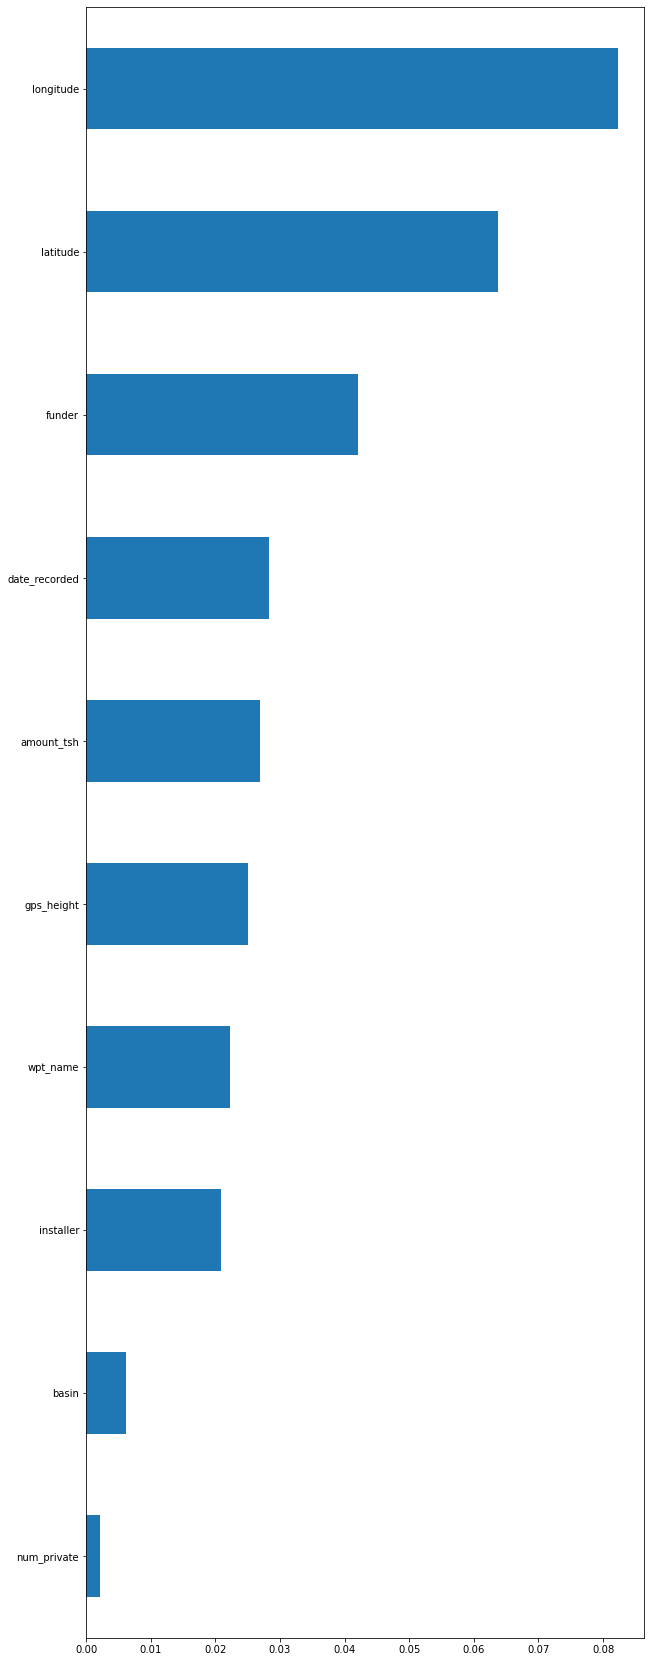

In [44]:
import matplotlib.pyplot as plt

# YOUR CODE HERE
# raise NotImplementedError()

# make an object that has the decision tree classified named step
pipeline = model.named_steps['decisiontreeclassifier']

#getting the column names
encoder = model.named_steps['ordinalencoder']
encoded_columns = encoder.transform(X_val).columns

# get feature importances
coefficients = pd.Series(pipeline.feature_importances_[:10], encoded_columns[:10])
plt.figure(figsize=(10,30))
coefficients.sort_values().plot.barh();
